<a href="https://colab.research.google.com/github/SiddativeG/Marketing-Research-Models/blob/main/Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded. Displaying the first few rows:


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4,Four Stars,1406073600,23-07-2014,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5,MOAR SPACE!!!,1382659200,25-10-2013,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4,nothing to really say....,1356220800,23-12-2012,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5,Great buy at this price!!! *** UPDATE,1384992000,21-11-2013,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5,best deal around,1373673600,13-07-2013,513,0,0



DataFrame with converted review_datetime:


,unixReviewTime,review_datetime
0,1406073600,2014-07-23
1,1382659200,2013-10-25
2,1356220800,2012-12-23
3,1384992000,2013-11-21
4,1373673600,2013-07-13



Helpful votes extracted from the 'helpful' column:


,helpful,helpful_parsed,helpful_votes_from_parsed
0,"[0, 0]","[0, 0]",0
1,"[0, 0]","[0, 0]",0
2,"[0, 0]","[0, 0]",0
3,"[0, 0]","[0, 0]",0
4,"[0, 0]","[0, 0]",0



Descriptive Statistics for numerical columns:


,overall,day_diff,helpful_yes,total_vote
count,4915.000000,4915.000000,4915.000000,4915.000000
mean,4.587589,437.367040,1.311089,1.521465
std,0.996845,209.439871,41.619161,44.123095
min,1.000000,1.000000,0.000000,0.000000
25%,5.000000,281.000000,0.000000,0.000000
50%,5.000000,431.000000,0.000000,0.000000
75%,5.000000,601.000000,0.000000,0.000000
max,5.000000,1064.000000,1952.000000,2020.000000


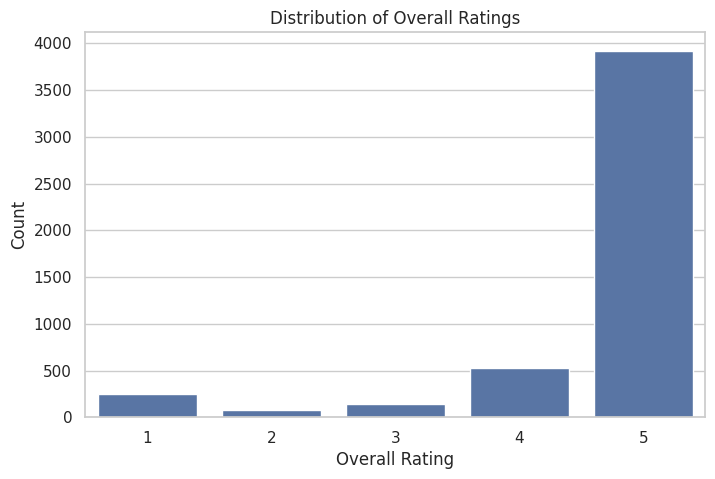


Review lengths (first few rows):


,reviewText,review_length
0,No issues.,2
1,"Purchased this for my device, it worked as adv...",31
2,it works as expected. I should have sprung for...,31
3,This think has worked out great.Had a diff. br...,66
4,"Bought it with Retail Packaging, arrived legit...",52


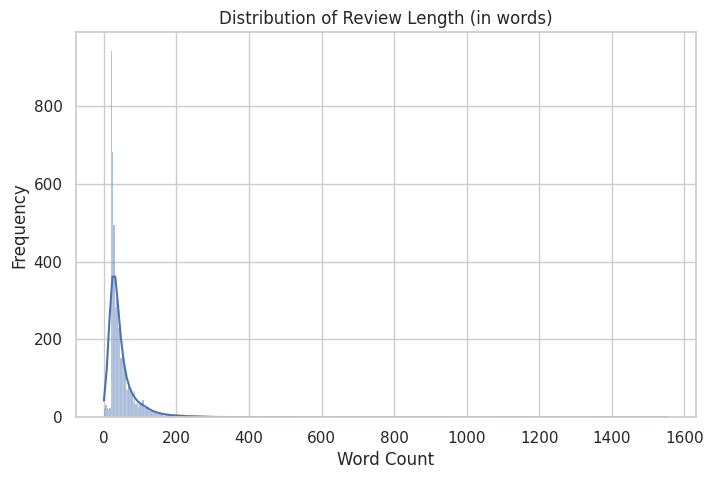


Sentiment scores for reviews:


,reviewText,sentiment
0,No issues.,0.000000
1,"Purchased this for my device, it worked as adv...",0.200000
2,it works as expected. I should have sprung for...,0.129167
3,This think has worked out great.Had a diff. br...,0.000000
4,"Bought it with Retail Packaging, arrived legit...",0.386667


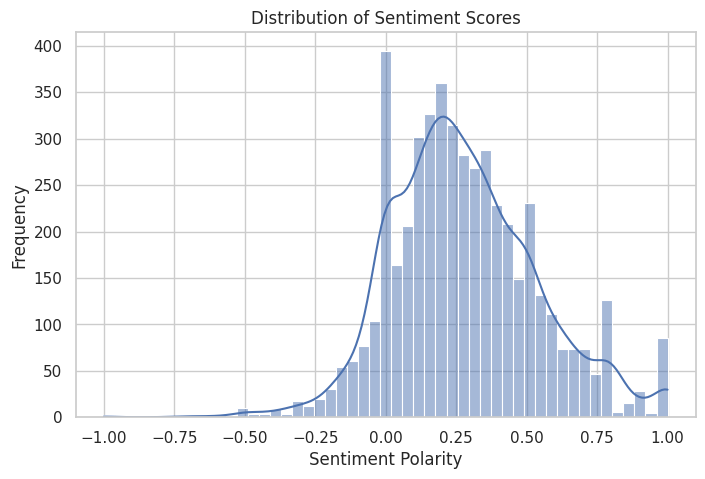


Number of reviews per year:


,review_year,count
0,2012,501
1,2013,2678
2,2014,1736


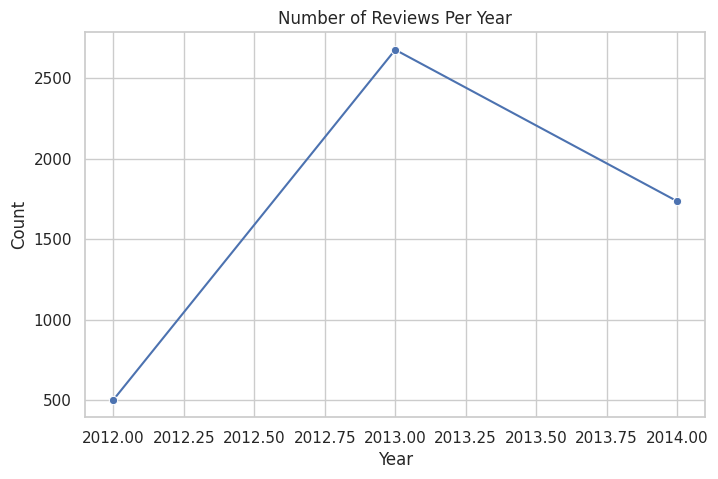


Product-specific analysis:


,asin,overall,sentiment,review_length
0,B007WTAJTO,4.587589,0.279028,50.442319


Analysis complete.


from matplotlib import pyplot as plt
reviews_per_year['review_year'].plot(kind='hist', bins=20, title='review_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
reviews_per_year['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
reviews_per_year.plot(kind='scatter', x='review_year', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['review_year']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = reviews_per_year.sort_values('review_year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('review_year')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['review_year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'review_year'}, axis=1)
              .sort_values('review_year', ascending=True))
  xs = counted['review_year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = reviews_per_year.sort_values('review_year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('review_year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
reviews_per_year['review_year'].plot(kind='line', figsize=(8, 4), title='review_year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
reviews_per_year['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [6]:
# Install required packages (if not already installed)
!pip install textblob

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import ast
import io

# Set seaborn style for better plots
sns.set(style="whitegrid")


# Replace 'data.csv' with the name of your file if different.
# If your CSV is comma-separated (standard CSV), use the default.
# If your CSV is tab-separated, add the parameter sep='\t'
df = pd.read_csv('amazon_review.csv')
print("Data loaded. Displaying the first few rows:")
display(df.head())

# --- 2. Data Cleaning and Preprocessing ---

# Convert the UNIX timestamp (unixReviewTime) to a datetime object
df['review_datetime'] = pd.to_datetime(df['unixReviewTime'], unit='s')
print("\nDataFrame with converted review_datetime:")
display(df[['unixReviewTime', 'review_datetime']].head())

# Process the 'helpful' column which is stored as a string like "[0, 0]"
# Convert the string to a Python list using ast.literal_eval and extract the first element
df['helpful_parsed'] = df['helpful'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [0, 0])
df['helpful_votes_from_parsed'] = df['helpful_parsed'].apply(lambda x: x[0])
print("\nHelpful votes extracted from the 'helpful' column:")
display(df[['helpful', 'helpful_parsed', 'helpful_votes_from_parsed']].head())

# --- 3. Exploratory Data Analysis (EDA) ---

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics for numerical columns:")
display(df[['overall', 'day_diff', 'helpful_yes', 'total_vote']].describe())

# Plot the distribution of overall ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='overall', data=df)
plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.show()

# Calculate review length (in words) for each reviewText
df['review_length'] = df['reviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
print("\nReview lengths (first few rows):")
display(df[['reviewText', 'review_length']].head())

# Plot distribution of review lengths
plt.figure(figsize=(8, 5))
sns.histplot(df['review_length'], kde=True)
plt.title("Distribution of Review Length (in words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

df['reviewText'] = df['reviewText'].fillna("").astype(str)

# --- 4. Sentiment Analysis ---

# Function to compute sentiment polarity using TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis on reviewText
df['sentiment'] = df['reviewText'].apply(get_sentiment)
print("\nSentiment scores for reviews:")
display(df[['reviewText', 'sentiment']].head())

# Plot distribution of sentiment scores
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment'], kde=True)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

# --- 5. Time Series Analysis ---

# Extract the year from review_datetime and count reviews per year
df['review_year'] = df['review_datetime'].dt.year
reviews_per_year = df.groupby('review_year').size().reset_index(name='count')
print("\nNumber of reviews per year:")
display(reviews_per_year)

# Plot the number of reviews per year
plt.figure(figsize=(8, 5))
sns.lineplot(data=reviews_per_year, x='review_year', y='count', marker='o')
plt.title("Number of Reviews Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# --- 6. Product-Specific Analysis ---

# Group reviews by product (asin) to analyze average overall rating, sentiment, and review length
product_analysis = df.groupby('asin').agg({
    'overall': 'mean',
    'sentiment': 'mean',
    'review_length': 'mean'
}).reset_index()
print("\nProduct-specific analysis:")
display(product_analysis)

print("Analysis complete.")


Data loaded. First few rows:


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4,Four Stars,1406073600,23-07-2014,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5,MOAR SPACE!!!,1382659200,25-10-2013,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4,nothing to really say....,1356220800,23-12-2012,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5,Great buy at this price!!! *** UPDATE,1384992000,21-11-2013,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5,best deal around,1373673600,13-07-2013,513,0,0


Content Analysis (word and character counts):


,reviewText,word_count,char_count
0,No issues.,2,10
1,"Purchased this for my device, it worked as adv...",31,158
2,it works as expected. I should have sprung for...,31,166
3,This think has worked out great.Had a diff. br...,66,340
4,"Bought it with Retail Packaging, arrived legit...",52,290


Top 10 most common words (including common words):
[('i', 9365), ('the', 9223), ('it', 7677), ('and', 7631), ('to', 6163), ('a', 5612), ('my', 5081), ('card', 4718), ('this', 4565), ('for', 4053)]
Sentiment Analysis:


,reviewText,sentiment
0,No issues.,0.000000
1,"Purchased this for my device, it worked as adv...",0.200000
2,it works as expected. I should have sprung for...,0.129167
3,This think has worked out great.Had a diff. br...,0.000000
4,"Bought it with Retail Packaging, arrived legit...",0.386667


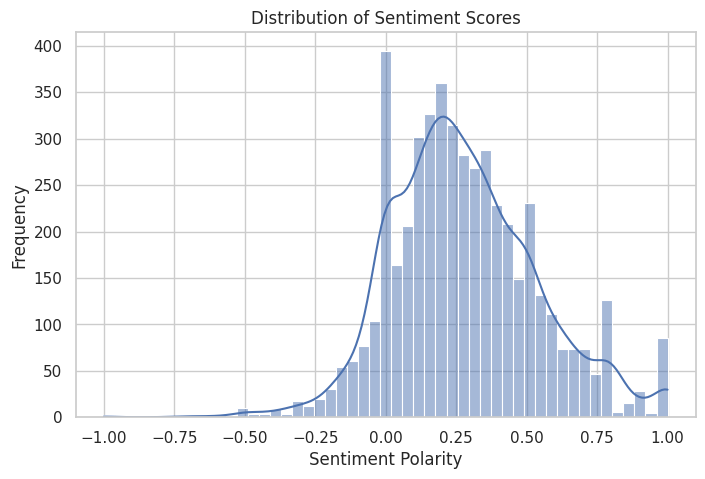

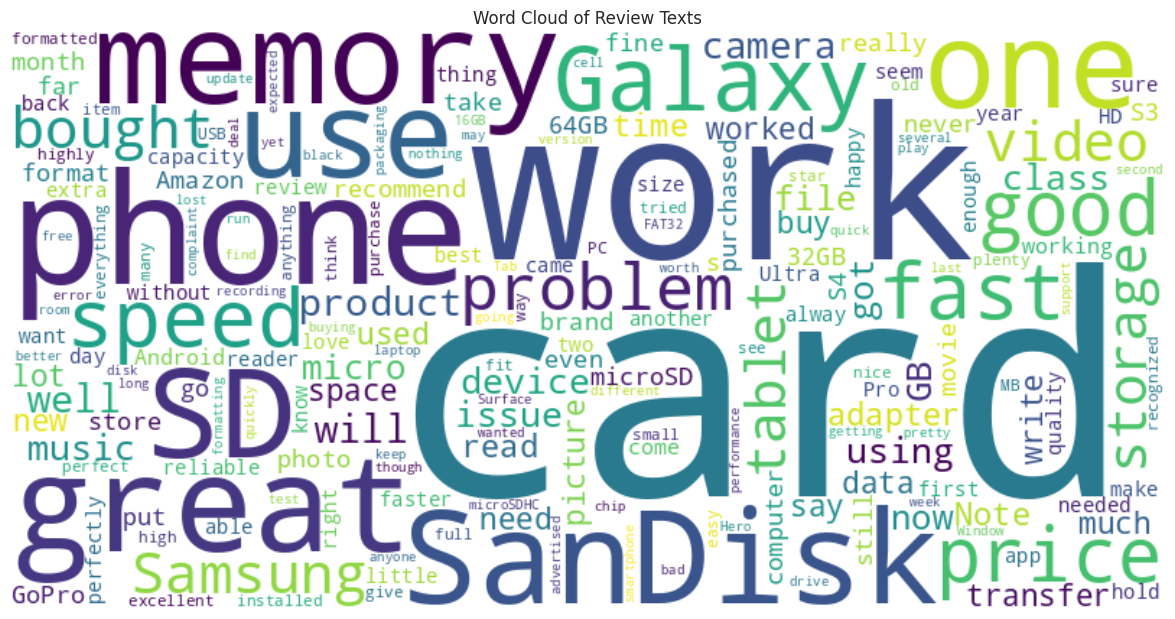

Analysis complete.


In [7]:
# Install required packages (if not already installed)
!pip install textblob wordcloud

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import io
from google.colab import files
from collections import Counter
import re

# Set Seaborn style for improved visualizations
sns.set(style="whitegrid")


# Replace 'data.csv' with your file name if different.
# Adjust the delimiter (sep) if your CSV is not comma-separated.
df = pd.read_csv('amazon_review.csv')

print("Data loaded. First few rows:")
display(df.head())

# --- 2. Data Preprocessing ---
# Ensure that the 'reviewText' column is a string. Fill any missing values with an empty string.
df['reviewText'] = df['reviewText'].fillna("").astype(str)

# (Optional) Convert unixReviewTime to a readable datetime if you want to use time-based analysis.
df['review_datetime'] = pd.to_datetime(df['unixReviewTime'], unit='s')

# --- 3. Content Analysis ---
# Calculate content metrics such as word count and character count.
df['word_count'] = df['reviewText'].apply(lambda x: len(x.split()))
df['char_count'] = df['reviewText'].apply(lambda x: len(x))

# Display content analysis results (first few rows)
print("Content Analysis (word and character counts):")
display(df[['reviewText', 'word_count', 'char_count']].head())

# Optionally, analyze the most frequent words in all reviews.
# Aggregate all text from reviewText.
all_text = " ".join(df['reviewText'].tolist())

# Lowercase the text and extract words using regex.
words = re.findall(r'\w+', all_text.lower())
word_freq = Counter(words)
top_words = word_freq.most_common(10)
print("Top 10 most common words (including common words):")
print(top_words)

# --- 4. Sentiment Analysis ---
# Define a function to compute sentiment polarity using TextBlob.
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to compute sentiment for each review.
df['sentiment'] = df['reviewText'].apply(get_sentiment)

# Display sentiment scores for the first few reviews.
print("Sentiment Analysis:")
display(df[['reviewText', 'sentiment']].head())

# Plot the distribution of sentiment scores.
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment'], kde=True)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

# --- 5. Word Cloud Visualization ---
# Define additional stopwords if needed (the library has a default set).
stopwords = set(STOPWORDS)
# You can add more custom stopwords if your domain has specific terms you want to ignore.
# Example: stopwords.update(["product", "review", "device"])

# Create a WordCloud object.
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white',
                      stopwords=stopwords,
                      collocations=False).generate(all_text)

# Plot the generated word cloud.
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Review Texts")
plt.show()

print("Analysis complete.")
